# A Simple Autoencoder 一个简单的自编码器

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

我们首先建立一个简单的自动编码器来压缩MNIST数据集。 使用自动编码器，我们通过编码器传递输入数据，该编码器对输入进行压缩表示。 然后，该表示通过解码器来重构输入数据。 通常，编码器和解码器将使用神经网络构建，然后对示例数据进行训练。

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

在这款笔记本中，我们将为编码器和解码器构建一个简单的网络架构。 我们先通过导入我们的库并获取数据集来开始。

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

下面我从MNIST数据集绘制一个示例图像。 这些是手写数字的28x28灰度图像。

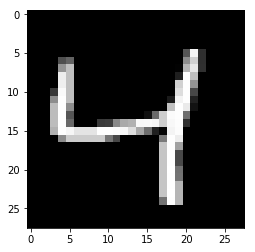

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

我们将训练一个具有这些图像的自动编码器，将它们平展成784个长度向量。 来自该数据集的图像已经被归一化，使得值在0和1之间。我们首先构建一个具有**单个ReLU隐藏层**的最简单的自动编码器。 该层将用作压缩表示。 然后，编码器是输入层和隐藏层。 解码器是隐层和输出层。 由于图像在0和1之间被归一化，所以我们需要在输出层**上使用** sigmoid激活来获得匹配输入的值。

![Autoencoder architecture](assets/simple_autoencoder.png)

> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

> **练习：**在下面的单元格中为自动编码器构建图形。 输入图像将被平坦化为784个长度向量。 目标与输入相同。 并且应该有一个具有ReLU激活的隐藏层和具有S形激活的输出层。 损失应该用交叉熵损失计算，对于这个`tf.nn.sigmoid_cross_entropy_with_logits`([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/))有一个方便的TensorFlow函数sigmoid_cross_entropy_with_logits））。 你应该注意到`tf.nn.sigmoid_cross_entropy_with_logits`需要逻辑，但要获得重构的图像，你需要通过sigmoid函数传递逻辑。

In [10]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None,image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None,image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

print("done")

done


## Training

In [11]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

在这里我将编写一些代码来训练网络。 我对这里的验证不太感兴趣，所以我只是监控训练损失。

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

调用`mnist.train.next_batch(batch_size)`将返回一个元组`(images，labels)`。 我们不关心这里的标签，我们只需要图像。 否则这是与TensorFlow相当直观的训练。 我们用`sess.run(tf.global_variables_initializer())`初始化变量。 然后，运行优化器，并使用`batch_cost,_ = sess.run([cost，opt]，feed_dict=feed))获取损失。

In [12]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6942
Epoch: 1/20... Training loss: 0.6913
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6852
Epoch: 1/20... Training loss: 0.6810
Epoch: 1/20... Training loss: 0.6768
Epoch: 1/20... Training loss: 0.6684
Epoch: 1/20... Training loss: 0.6629
Epoch: 1/20... Training loss: 0.6553
Epoch: 1/20... Training loss: 0.6441
Epoch: 1/20... Training loss: 0.6310
Epoch: 1/20... Training loss: 0.6186
Epoch: 1/20... Training loss: 0.6029
Epoch: 1/20... Training loss: 0.5914
Epoch: 1/20... Training loss: 0.5735
Epoch: 1/20... Training loss: 0.5572
Epoch: 1/20... Training loss: 0.5410
Epoch: 1/20... Training loss: 0.5265
Epoch: 1/20... Training loss: 0.5027
Epoch: 1/20... Training loss: 0.4823
Epoch: 1/20... Training loss: 0.4642
Epoch: 1/20... Training loss: 0.4475
Epoch: 1/20... Training loss: 0.4326
Epoch: 1/20... Training loss: 0.4240
Epoch: 1/20... Training loss: 0.4069
Epoch: 1/20... Training loss: 0.3900
Epoch: 1/20... Training loss: 0.3770
E

## Checking out the results 检查结果

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

下面我绘制了一些测试图像及其重建。 在大多数情况下，这些看起来很好，除了在某些部分有些模糊。

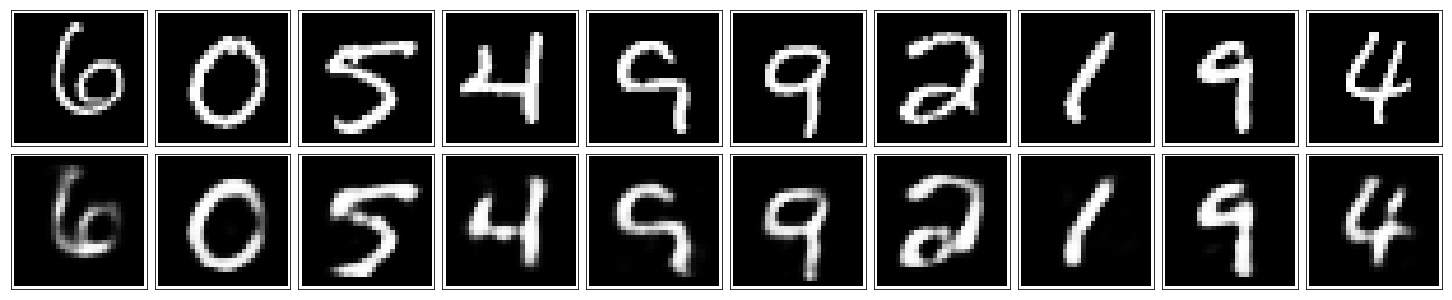

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[100:110]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next 下一步

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

我们在这里处理图像，所以我们可以（通常）使用卷积层获得更好的性能。 那么接下来，我们将建立一个更好的自动编码器卷积层。

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.

实际上，像JPEG和MP3这样的典型方法，自动编码器实际上并不比压缩更好。 但是，它们正在用于降噪，您也将建立它。